In [4]:
import numpy 
import ternary
import matplotlib
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.ticker as ticker
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['figure.figsize'] = (3, 3)


# Code for reading in color Intensity logs

In [50]:
filename = "Z:/fred/dec2019/3rdBatch_PVcreSecondImaging/bl0/nTracer/color_intensityLog.txt"
r = []
g = []
b = []

with open(filename) as f:
    for line in f:
        data = line.split(', ')
        b.append(float(data[3]))
        g.append(float(data[4]))
        r.append(float(data[5][0:-2]))

r = numpy.array(r)
g = numpy.array(g)
b = numpy.array(b)

#Normalize the data to the highest value in each column
#r = r/(max(r)+max(g)+max(b))
#g = g/(max(r)+max(g)+max(b))
#b = b/(max(r)+max(g)+max(b))

#Normalize the data by plotting relative contributubtions of RGB

data = numpy.stack((r,g,b),axis = -1)
for i in range(0,len(data)):
    z = numpy.sum(data[i]);
    data[i,0] = data[i,0]/z;
    data[i,1] = data[i,1]/z;
    data[i,2] = data[i,2]/z;

axon_fn =  "Z:/fred/dec2019/3rdBatch_PVcreSecondImaging/bl0/nTracer/listAfferentAxons.csv";
with open(axon_fn, 'r', encoding='utf-8-sig') as f: 
    listAxons = numpy.genfromtxt(f, dtype=int, delimiter=',')

#Extract out relavant neurites for each neuron soma analyzed
idx = listAxons[:,0]; n_fn =  'E:/MiRiEx/figures/sFig spectral analysis/ternary_plots/neuron1';
idx = listAxons[:,1]; n_fn =  'E:/MiRiEx/figures/sFig spectral analysis/ternary_plots/neuron6';
idx = listAxons[:,2]; n_fn =  'E:/MiRiEx/figures/sFig spectral analysis/ternary_plots/neuron26';
idx = listAxons[:,3]; n_fn =  'E:/MiRiEx/figures/sFig spectral analysis/ternary_plots/neuron30';
idx = listAxons[:,4]; n_fn =  'E:/MiRiEx/figures/sFig spectral analysis/ternary_plots/neuron37';
idx = listAxons[:,5]; n_fn =  'E:/MiRiEx/figures/sFig spectral analysis/ternary_plots/neuron38';
idx = listAxons[:,6]; n_fn =  'E:/MiRiEx/figures/sFig spectral analysis/ternary_plots/neuron47';
idx = listAxons[:,7];n_fn = 'E:/MiRiEx/figures/sFig spectral analysis/ternary_plots/neuron54'

adj_idx = []
old_idx = []
for x in idx:
    if x>0: adj_idx.append(x-1)
    if x>0: old_idx.append(x-1)



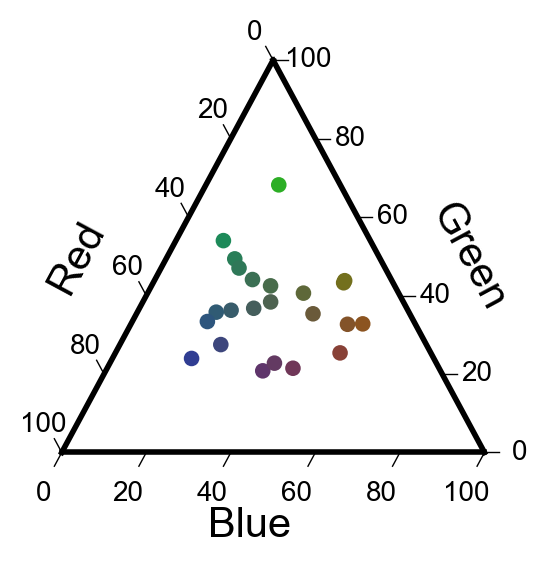

In [27]:
#matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['figure.dpi'] = 200
outfn = n_fn + '_ternary.svg'

scale = 100
figure, tax = ternary.figure(scale=scale)
# figure.set_size_inches(10, 10)

# Draw Boundary and Gridlines
sns.set_context('paper')
tax.boundary(linewidth=2.0)
#tax.gridlines(color="black", multiple=10,)

# Set Axis labels and Title
fontsize = 15
offset = 0.2
#tax.set_title("Neuron 1\n", fontsize=fontsize, fontname ='Arial')
tax.left_axis_label("Red", fontsize=fontsize, offset=offset, fontname ='Arial')
tax.right_axis_label("Green", fontsize=fontsize, offset=offset, fontname ='Arial')
tax.bottom_axis_label("Blue", fontsize=fontsize, offset=offset, fontname ='Arial')

#idx = [18,19,21,8,23,40]
tax.scatter(100*data[adj_idx,:], color = data[adj_idx,:]);

tax.ticks(axis='lbr', multiple=20, linewidth=.5, offset=0.035)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

#for i, txt in enumerate(old_idx):
#    tax.annotate(txt, (100*data[txt,0]+1,100*data[txt,1]+1,100*data[txt,2]), fontsize = 4)


tax.savefig(outfn, dpi=300)

# Code for elbow plot


Number of Clusters = 9


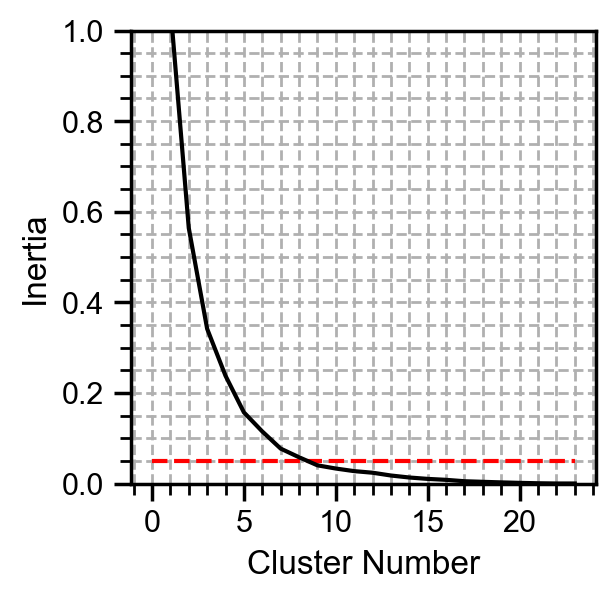

In [51]:
outfn = n_fn + '_elbow.svg'

inertia = []
K = range(1,len(data[adj_idx,:])+1)

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data[adj_idx,:]) 
    inertia.append(kmeanModel.inertia_)

res = next(x for x, val in enumerate(inertia) if val <.05);
cluster_cutoff = K[res];
#cluster_cutoff = 3

sns.set_context('notebook')
fig, ax = plt.subplots()

ax.plot(K,inertia, c = 'black')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.grid(which = 'both',linestyle = '--')
ax.tick_params(axis='both', which='major')
ax.set_ylim(0,1)

ax.set_xlabel('Cluster Number')
ax.set_ylabel('Inertia')
ax.hlines(.05,0,K[-1],colors = 'red', linestyles = 'dashed')

plt.savefig(outfn, dpi=300)
print('Number of Clusters = ' + str(cluster_cutoff))
    #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
    #                  'euclidean'),axis=1)) / X.shape[0]) 
    #inertias.append(kmeanModel.inertia_) 
  
    #mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
    #             'euclidean'),axis=1)) / X.shape[0] 
    #mapping2[k] = kmeanModel.inertia_ 

In [ ]:
outfn = n_fn + '_CHindex.svg'

CHindex = []
K = range(2,len(data[adj_idx,:]))

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data[adj_idx,:]) 
    CHindex.append(metrics.calinski_harabaz_score(data[adj_idx,:],kmeanModel.labels_));
    
fig, ax = plt.subplots()

ax.plot(K,CHindex, c = 'black')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.grid(which = 'both',linestyle = '--')
ax.tick_params(axis='both', which='major', labelsize=12)


ax.set_xlabel('Cluster Number',fontsize = 14)
#plt.savefig(outfn, dpi=300)
    #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
    #                  'euclidean'),axis=1)) / X.shape[0]) 
    #inertias.append(kmeanModel.inertia_) 
  
    #mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
    #             'euclidean'),axis=1)) / X.shape[0] 
    #mapping2[k] = kmeanModel.inertia_ 

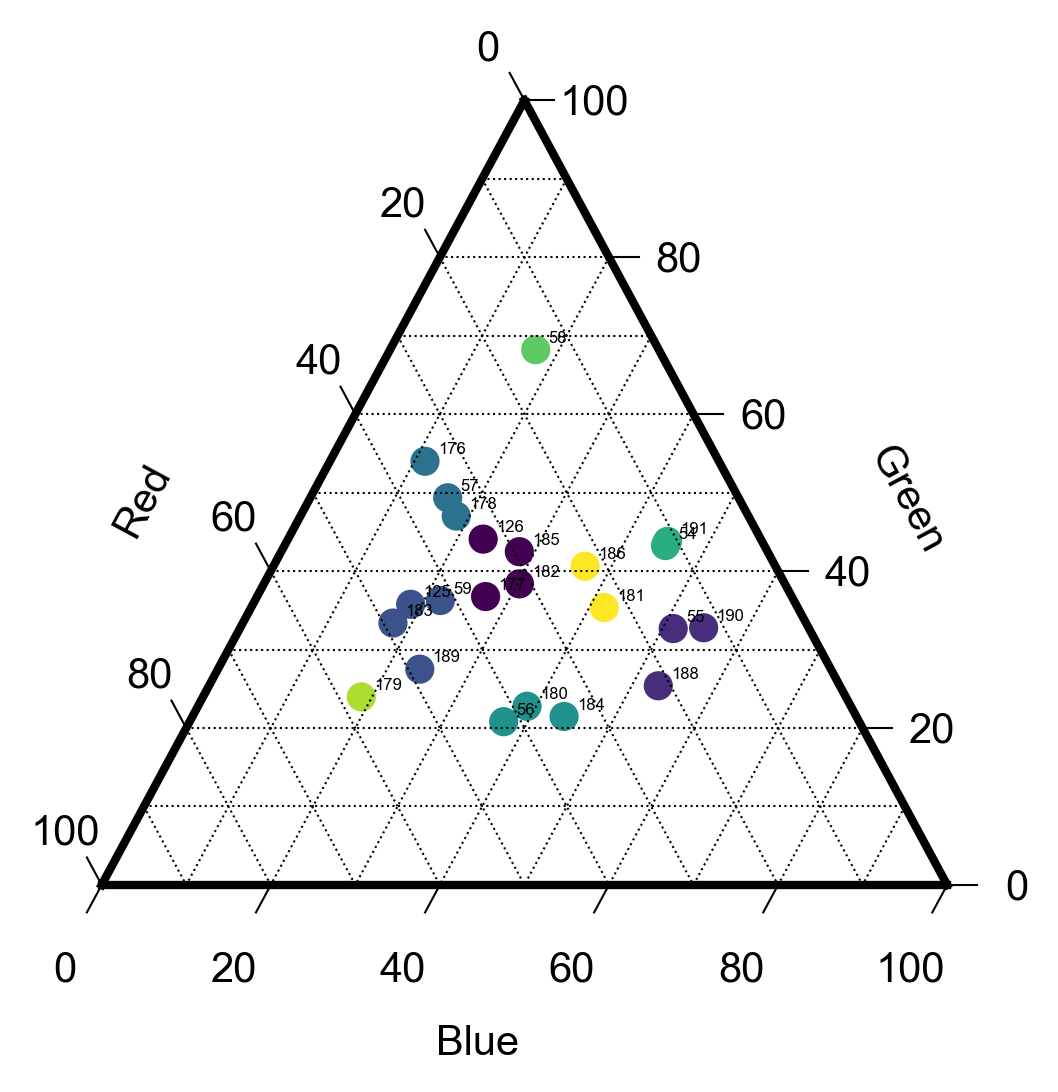

In [175]:
outfn = n_fn + '_kmeansCluster.svg'
kmeanModel = KMeans(n_clusters=cluster_cutoff).fit(data[adj_idx,:])
matplotlib.rcParams['figure.dpi'] = 300

labelColors = kmeanModel.labels_/max(kmeanModel.labels_)
matplotlib.rcParams['figure.figsize'] = (4, 4)

scale = 100
figure, tax = ternary.figure(scale=scale)
# figure.set_size_inches(10, 10)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=10,)

# Set Axis labels and Title
fontsize = 10
offset = 0.2
#tax.set_title("Neuron 1", fontsize=fontsize, fontname ='Arial')
tax.left_axis_label("Red", fontsize=fontsize, offset=offset, fontname ='Arial')
tax.right_axis_label("Green", fontsize=fontsize, offset=offset, fontname ='Arial')
tax.bottom_axis_label("Blue", fontsize=fontsize, offset=offset, fontname ='Arial')

tax.scatter(100*data[adj_idx,:], c = labelColors);

tax.ticks(axis='lbr', multiple=20, linewidth=.5, offset=0.035)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

for i, txt in enumerate(old_idx):
    tax.annotate(txt, (100*data[txt,0]+1,100*data[txt,1]+1,100*data[txt,2]), fontsize = 4)

tax.savefig(outfn, dpi=300)